In [2]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

In [3]:
def plot_comparision3(
    im0: np.array,
    im1: np.array,
    im2: np.array,
    titles: Tuple[str, str, str] = ('', '', '')) -> None:
    """
    Plota um subplot com as três imagens informadas. O parâmetro
    de títulos é opcional.
    """
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(im0, cmap='gray')
    axs[0].set_title(titles[0])
    axs[1].imshow(im1, cmap='gray')
    axs[1].set_title(titles[1])
    axs[2].imshow(im2, cmap='gray')
    axs[2].set_title(titles[2])
    plt.show()

def plot_comparision2(
    im0: np.array,
    im1: np.array,
    titles: Tuple[str, str] = ('', '')) -> None:
    """
    Plota um subplot com as duas imagens informadas. O parâmetro
    de títulos é opcional.
    """
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(im0, cmap='gray')
    axs[0].set_title(titles[0])
    axs[1].imshow(im1, cmap='gray')
    axs[1].set_title(titles[1])
    plt.show()


def get_gaussian_filter(shape: Tuple[int, int], diameter: int) -> np.array:
    """
    Retorna um filtro gaussiano com o diâmetro informado.
    """
    y = np.arange(-shape[0], shape[0], 1)
    x = np.arange(-shape[1], shape[1], 1)

    u, v = np.meshgrid(x, y)
    D = np.sqrt(u**2 + v**2)

    return np.exp(-(D**2) / (2*(diameter**2)))


def get_butterworth_filter(shape: Tuple[int, int], diameter: int, order: int = 2) -> np.array:
    """
    Retorna um filtro de Butterworth com o diâmetro
    e ordem informadoss.
    """
    y = np.arange(-shape[0], shape[0], 1)
    x = np.arange(-shape[1], shape[1], 1)

    u, v = np.meshgrid(x, y)
    D = np.sqrt(u**2 + v**2)

    return 1 / (1 + (D/diameter)**(2*order))

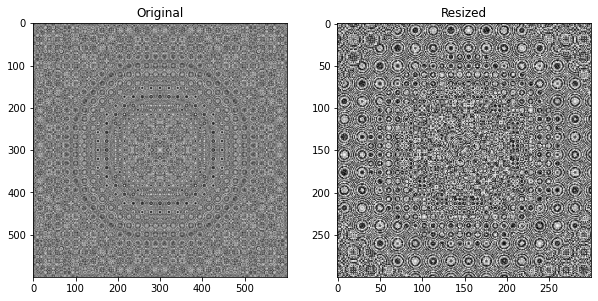

In [4]:
image = plt.imread('../images/frexp_1.png')

N, M = image.shape
image_resized = np.zeros(shape=(N//2, M//2), dtype=image.dtype)

for y in range(0, N, 2):
    for x in range(0, M, 2):
        image_resized[y//2, x//2] = image[y, x]

plot_comparision2(image, image_resized, ('Original', 'Resized'))

A imagem sofreu aliasing, devido ao surgimento de frequências não existentes pelo processo de reamostragem. Aliasing, usualmente, é tratado pela aplicação de um filtro passa-baixas para que tenhamos apenas frequências que conseguimos amostrar seguindo o teorema de Nyquist.

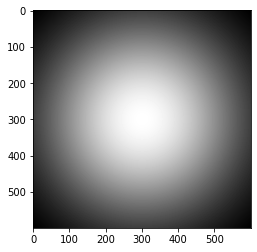

In [5]:
H_gauss = get_gaussian_filter(image_resized.shape, 200)
plt.imshow(H_gauss, cmap='gray')
plt.show()

In [6]:
im_fill = np.zeros((2*image_resized.shape[0], 2*image_resized.shape[1]))
im_fill[0:image_resized.shape[0], 0:image_resized.shape[1]] = image_resized
F_shift = np.fft.fftshift(np.fft.fft2(im_fill))

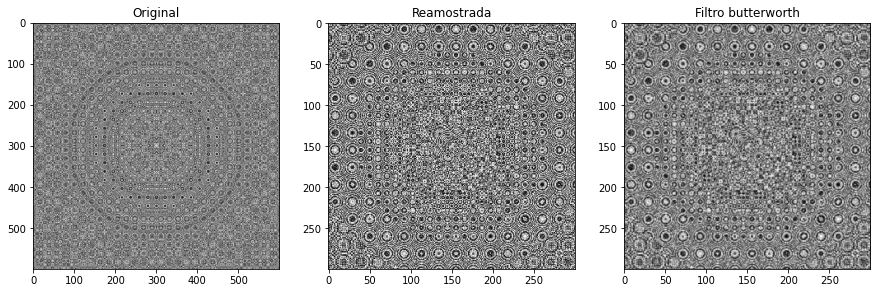

In [8]:
G_gauss = F_shift * H_gauss
im_gauss_fill = np.real(np.fft.ifft2(np.fft.fftshift(G_gauss))) 
im_gauss = im_gauss_fill[0:image_resized.shape[0], 0:image_resized.shape[1]]

plot_comparision3(
    image, image_resized, im_gauss,
    ('Original', 'Reamostrada', 'Filtro butterworth'))

Com a aplicação do filtro conseguimos melhorar a imagem, entretanto, ainda possui traços de aliasing presentes na imagem. Destaca-se que é improvável retornarmos ao estágio original uma vez que muita informação for perdida do processo de reamostragem utilizado, portanto, filtros passa-baixas tendem a ajudar mas não tem um resultado muito expressivo sem deterior muito a imagem, neste casso, borrando-a.